In [14]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

data_name = 'newsess_tryNRL_nobaseline_nobatch_hand8.csv'
# Specify the path to your Excel file
csv_file_path = 'F:\\Nueron_maze\\Thesis\\Data\\Phase2\\'+ data_name

columns_to_read = ['Time', 'Predict_Raw', 'Predict', 'Cue']

df = pd.read_csv(csv_file_path, header=None, names=columns_to_read)

# fillna and drop data before first direction cue
df['Cue'] = df['Cue'].fillna('no_data')
df = df.iloc[df[df['Cue'] != 'no_data'].index[0]-30:]

In [15]:
left_index = 0
right_index = 1
non_imagine_index = 2
feet_index = None

time_second = [0,4]  # Select time range(after cue) to plot predict value
Frequency = 10

# Adjust code for we can adjust thereshold for predict_raw column
predict_thereshold = None # if probability predict value less than thereshold -> give non-imagine as output
strike = 1
avg_lenght = 4

for ii in range(0,df.shape[0]):
    df['Predict_Raw'].values[ii] = np.array(df['Predict_Raw'].values[ii][1:-1].split()) #change index cut range to [2:-2] if LDA
    # df['Predict_Raw'].values[ii] = np.array(df['Predict_Raw'].values[ii][2:-2].split())

# if predict_thereshold != None:
#     for ii in range(0,df.shape[0]):
#         max_index =  df['Predict_Raw'].values[ii].argmax()
#         if  float(df['Predict_Raw'].values[ii][max_index]) >= predict_thereshold:
#             df['Predict'].values[ii] = df['Predict_Raw'].values[ii].argmax()
#         else: 
#             df['Predict'].values[ii] = non_imagine_index
# else:
#     for ii in range(0,df.shape[0]):
#         df['Predict'].values[ii] = df['Predict_Raw'].values[ii].argmax()

In [16]:
df

,Time,Predict_Raw,Predict,Cue
258,2:34:42,"[0.01190904, 0.00509181, 0.98299915]",2,no_data
259,2:34:42,"[0.00742532, 0.00564758, 0.9869271]",2,no_data
260,2:34:42,"[0.01045466, 0.03721688, 0.95232844]",2,no_data
261,2:34:42,"[0.03051109, 0.02735147, 0.9421374]",2,no_data
262,2:34:42,"[0.07234357, 0.03004779, 0.89760864]",2,no_data
...,...,...,...,...
1995,2:37:35,"[0.00442322, 0.06200244, 0.9335743]",2,no_data
1996,2:37:35,"[0.00243502, 0.04899985, 0.9485651]",2,no_data
1997,2:37:35,"[0.00484774, 0.06561337, 0.9295389]",2,no_data
1998,2:37:36,"[0.00730578, 0.07276377, 0.9199304]",2,no_data


In [17]:
df['Cue'].unique()

array(['no_data', 'Right', 'Left'], dtype=object)

In [18]:
result_df = pd.DataFrame(columns=['Time','New_Predict', 'New_Cue'])
for ii in range(0,df.shape[0],strike):
    cue_array = df['Cue'].values[ii:ii+strike]
    if 'Noim' in cue_array:
        new_cue = 'Noim'
    elif 'Left' in cue_array:
        new_cue = 'Left'
    elif 'Right' in cue_array:
        new_cue = 'Right'
    elif 'Feet' in cue_array:
        new_cue = 'Feet'
    else:
        new_cue = 'no_data'
    if ii > avg_lenght:
        new_predict = mode(df['Predict'].values[ii-avg_lenght:ii], keepdims = True).mode[0]
    else:
        new_predict = df['Predict'].values[ii]
    result_df = result_df._append({'Time': df['Time'].values[ii], 'New_Predict': new_predict, 'New_Cue': new_cue},ignore_index=True)
    print(new_predict,new_cue)

2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 Right
2 no_data
2 no_data
2 no_data
2 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
1 no_data
2 no_data
2 no_data
2 no_data
2 no_data
1 no_data
1 no_data
1 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 no_data
2 

In [19]:
result_df

,Time,New_Predict,New_Cue
0,2:34:42,2,no_data
1,2:34:42,2,no_data
2,2:34:42,2,no_data
3,2:34:42,2,no_data
4,2:34:42,2,no_data
...,...,...,...
1737,2:37:35,2,no_data
1738,2:37:35,2,no_data
1739,2:37:35,2,no_data
1740,2:37:36,2,no_data


In [20]:
target_classes = ['Left', 'Right', 'Up']
indicest_o_select= []

result_df['New_Cue']

cue_rows = result_df[(result_df['New_Cue'] != 'no_data') & (result_df['New_Cue'] != 'Noim')]

for ii in cue_rows.index:
# indices_to_select
    get_cue = result_df['New_Cue'].values[ii]
    print(get_cue)
    if ii + (int((Frequency/strike)*time_second[1])) < result_df.shape[0]:
        for jj in range(Frequency*time_second[0],int((Frequency/strike)*time_second[1])):
            indicest_o_select.append(ii+jj)
            result_df['New_Cue'].values[ii+jj] =  get_cue

print(indicest_o_select)

print(cue_rows.index)
# Use loc to select the rows 15 positions below the rows where 'New_Cue' is 'right'
cue_df = result_df.loc[indicest_o_select]
cue_df

Right
Right
Left
Right
Left
Right
Right
Left
Left
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607,

,Time,New_Predict,New_Cue
30,2:34:45,2,Right
31,2:34:45,2,Right
32,2:34:45,2,Right
33,2:34:45,2,Right
34,2:34:45,2,Right
...,...,...,...
1685,2:37:30,1,Left
1686,2:37:30,1,Left
1687,2:37:30,2,Left
1688,2:37:30,2,Left


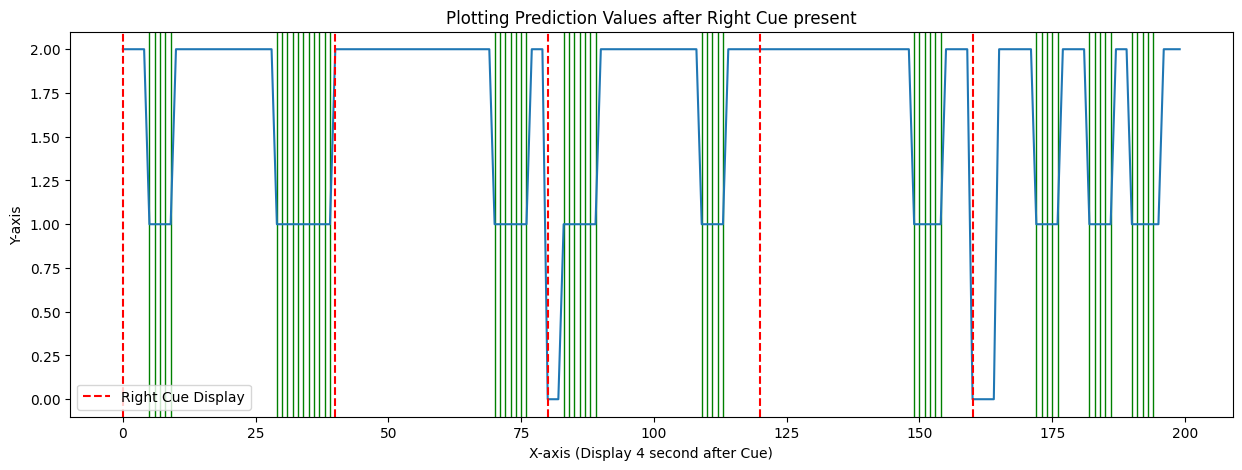

*************Right Imagine Phase*********
right_pred_after_rightcue 28.499999999999996
left_pred_after_rightcue 4.0
NC_pred_after_rightcue 67.5


In [21]:
if right_index != None:
    right_rows = cue_df[cue_df['New_Cue'] == 'Right']
    correct_right_pred = len(right_rows['New_Predict'].values[right_rows['New_Predict'].values == right_index]) / right_rows.shape[0] * 100
    wrongleft_right_pred = len(right_rows['New_Predict'].values[right_rows['New_Predict'].values == left_index]) / right_rows.shape[0] * 100
    wrongNC_right_pred = len(right_rows['New_Predict'].values[right_rows['New_Predict'].values == non_imagine_index]) / right_rows.shape[0] * 100

    x_plot = np.arange(0, right_rows.shape[0])

    plt.figure(figsize=(15, 5))
    plt.plot(x_plot, right_rows['New_Predict'])
    plt.xlabel('X-axis (Display 4 second after Cue)')
    plt.ylabel('Y-axis')
    plt.title('Plotting Prediction Values after Right Cue present')
    plt.ylim(-0.1, 2.1)
    for i in range(0, right_rows.shape[0], int((Frequency/strike)*(time_second[1]-time_second[0]))):
        if i == 0:
            plt.axvline(x=i, color='red', linestyle='--', label=f'Right Cue Display')
        else:
            plt.axvline(x=i, color='red', linestyle='--')


    highlight_indices = np.where(np.array(right_rows['New_Predict']) == right_index)[0]
    for start, end in zip(highlight_indices[:-1], highlight_indices[1:]):
        plt.axvspan(x_plot[start], x_plot[start], color='green', alpha=1)

    plt.legend()
    plt.show()

    print("*************Right Imagine Phase*********")
    print('right_pred_after_rightcue', correct_right_pred)
    print('left_pred_after_rightcue', wrongleft_right_pred)
    print('NC_pred_after_rightcue', wrongNC_right_pred)


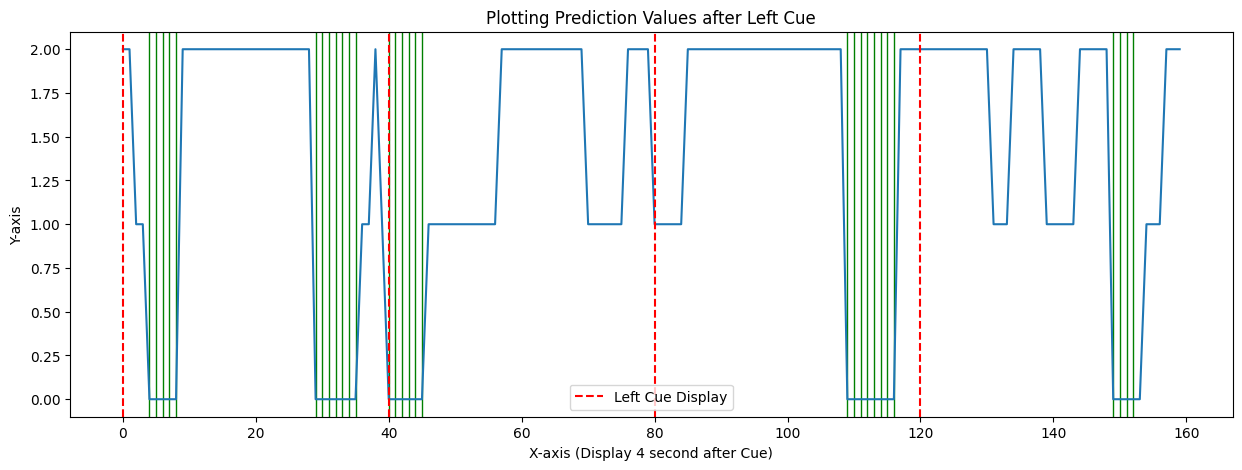

*************Left Imagine Phase*********
left_pred_after_leftcue 19.375
right_pred_after_leftcue 23.75
NC_pred_after_leftcue 56.875


In [22]:
if left_index != None:
    left_rows = cue_df[cue_df['New_Cue'] == 'Left']
    correct_left_pred = len(left_rows['New_Predict'].values[left_rows['New_Predict'].values == left_index]) / left_rows.shape[0] * 100
    wrongright_left_pred = len(left_rows['New_Predict'].values[left_rows['New_Predict'].values == right_index]) / left_rows.shape[0] * 100
    wrongNC_left_pred = len(left_rows['New_Predict'].values[left_rows['New_Predict'].values == non_imagine_index]) / left_rows.shape[0] * 100

    plt.figure(figsize=(15, 5))
    plt.plot(np.arange(0, left_rows.shape[0]), left_rows['New_Predict'])
    plt.xlabel('X-axis (Display 4 second after Cue)')
    plt.ylabel('Y-axis')
    plt.title('Plotting Prediction Values after Left Cue')
    plt.ylim(-0.1, 2.1)
    for i in range(0, left_rows.shape[0], int((Frequency/strike)*(time_second[1]-time_second[0]))):
        if i == 0:
            plt.axvline(x=i, color='red', linestyle='--', label=f'Left Cue Display')
        else:
            plt.axvline(x=i, color='red', linestyle='--')

    x_plot = np.arange(0, left_rows.shape[0])

    highlight_indices = np.where(np.array(left_rows['New_Predict']) == left_index)[0]
    for start, end in zip(highlight_indices[:-1], highlight_indices[1:]):
        plt.axvspan(x_plot[start], x_plot[start], color='green', alpha=1.0)

    plt.legend()
    plt.show()

    print("*************Left Imagine Phase*********")
    print('left_pred_after_leftcue', correct_left_pred)
    print('right_pred_after_leftcue', wrongright_left_pred)
    print('NC_pred_after_leftcue', wrongNC_left_pred)

In [23]:
# correct_imagine_pred = len(cue_df['New_Predict'].values[cue_df['New_Predict'].values == 0]) / cue_df.shape[0] * 100
# wrongNC_imagine_pred = len(cue_df['New_Predict'].values[cue_df['New_Predict'].values == non_imagine_index]) / cue_df.shape[0] * 100
# x_plot = np.arange(0, cue_df.shape[0])

# plt.figure(figsize=(15, 5))
# plt.plot(x_plot, cue_df['New_Predict'])
# plt.xlabel('X-axis (Display 4 second after Cue)')
# plt.ylabel('Y-axis')
# plt.title('Plotting Prediction Values for 4 seconds after Imagine Cue present')
# plt.ylim(-0.1, 2.1)
# for i in range(0, cue_df.shape[0], int((10/strike)*(time_second[1]-time_second[0]))):
#     if i == 0:
#         plt.axvline(x=i, color='red', linestyle='--', label=f'Imagine Cue Display')
#     else:
#         plt.axvline(x=i, color='red', linestyle='--')


# highlight_indices = np.where(np.array(cue_df['New_Predict']) == right_index)[0]
# for start, end in zip(highlight_indices[:-1], highlight_indices[1:]):
#     plt.axvspan(x_plot[start], x_plot[start], color='green', alpha=1)

# plt.legend()
# plt.show()

# print("*************Imagine Phase*********")
# print('imagine_pred_after_imaginecue', correct_imagine_pred)
# print('NC_pred_after_imaginecue', wrongNC_imagine_pred)

In [24]:
# up_rows = cue_df[cue_df['New_Cue'] == 'Feet']
# correct_up_pred = len(up_rows['New_Predict'].values[up_rows['New_Predict'].values == feet_index]) / up_rows.shape[0] * 100
# wrongNC_up_pred = len(up_rows['New_Predict'].values[up_rows['New_Predict'].values == non_imagine_index]) / up_rows.shape[0] * 100

# print("*************Up Imagine Phase*********")
# print('up_pred_after_upcue', correct_up_pred)
# print('NC_pred_after_leftcue', wrongNC_up_pred)

In [25]:
nonim_df = result_df.drop(indicest_o_select)
nonim_df

,Time,New_Predict,New_Cue
0,2:34:42,2,no_data
1,2:34:42,2,no_data
2,2:34:42,2,no_data
3,2:34:42,2,no_data
4,2:34:42,2,no_data
...,...,...,...
1737,2:37:35,2,no_data
1738,2:37:35,2,no_data
1739,2:37:35,2,no_data
1740,2:37:36,2,no_data


In [26]:
True_positive = len(nonim_df['New_Predict'].values[nonim_df['New_Predict'].values == non_imagine_index]) / nonim_df.shape[0] *100
Left_false = len(nonim_df['New_Predict'].values[nonim_df['New_Predict'].values == left_index]) / nonim_df.shape[0] *100
Right_false = len(nonim_df['New_Predict'].values[nonim_df['New_Predict'].values == right_index]) / nonim_df.shape[0] *100

print("*************Non-Imagine Phase*********")
print("Accuracy of non-imagine in NC state", True_positive)
print("Wrong Predict Left in NC state", Left_false)
print("Wrong Predict Right in NC state",Right_false)

# print("Wrong Predict Imagine in NC state", Left_false)

*************Non-Imagine Phase*********
Accuracy of non-imagine in NC state 69.97105643994212
Wrong Predict Left in NC state 3.61794500723589
Wrong Predict Right in NC state 26.410998552821997
